# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

In [1]:
# print(len(cities['lats']<0))


NameError: name 'cities' is not defined

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# for x in range(len(cities)):
#     print(f"Processing Record {x} of Set 1: {cities[x]}")
 # Get one of the posts
c_lats =[]    
c_lngs =[]
max_temp =[]
country =[]
cloudiness =[]
windspeed =[]
humidity =[]
date =[]
f_cities=[]
x= 0
y= 1
print('Beginning Data Retrieval')    
print('-----------------------------')
for city in cities:   
    url= f'http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_api_key}'
    post_response = requests.get(url).json()
 
    x += 1 
    if x == 50: 
        y += 1
        x = 0
    try:
        f_cities.append(post_response['name'])
        c_lats.append(post_response['coord']['lat'])
        c_lngs.append(post_response['coord']['lon'])
        max_temp.append(post_response['main']['temp_max'])
        country.append(post_response['sys']['country'])
        cloudiness.append(post_response['clouds']['all'])
        windspeed.append(post_response['wind']['speed'])
        humidity.append(post_response['main']['humidity'])
        date.append(post_response['dt'])
        print(f"Processing Record {x} of Set {y} | {post_response['name']}")
    except KeyError:
        print('City Not Found. Skipped')
# for x in range(len(cities)):
#     print(f"Processing Record {x} of Set 1: {post_response[13]}")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Port-Cartier
Processing Record 2 of Set 1 | Butaritari
Processing Record 3 of Set 1 | Klaksvík
Processing Record 4 of Set 1 | Sechura
Processing Record 5 of Set 1 | Belaya Gora
Processing Record 6 of Set 1 | Qaanaaq
City Not Found. Skipped
Processing Record 8 of Set 1 | Jamestown
Processing Record 9 of Set 1 | Yining
City Not Found. Skipped
Processing Record 11 of Set 1 | Bonthe
Processing Record 12 of Set 1 | Thaton
Processing Record 13 of Set 1 | Hithadhoo
Processing Record 14 of Set 1 | Bluff
Processing Record 15 of Set 1 | Busselton
Processing Record 16 of Set 1 | Mataura
Processing Record 17 of Set 1 | Shannon
Processing Record 18 of Set 1 | Norman
Processing Record 19 of Set 1 | Kamenka
Processing Record 20 of Set 1 | Alice Springs
Processing Record 21 of Set 1 | Itarema
Processing Record 22 of Set 1 | Tuktoyaktuk
Processing Record 23 of Set 1 | Cabo San Lucas
Processing Record 24 of Set 1 | Ava

In [5]:

print(post_response)
# {'cod': 429, 'message': 'Your account is temporary blocked due to exceeding of requests limitation of your subscription type. Please choose the proper subscription http://openweathermap.org/price'}


{'coord': {'lon': 78.75, 'lat': 14.05}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 80.91, 'feels_like': 87.04, 'temp_min': 80.91, 'temp_max': 80.91, 'pressure': 1008, 'humidity': 66, 'sea_level': 1008, 'grnd_level': 966}, 'visibility': 10000, 'wind': {'speed': 1.3, 'deg': 351}, 'clouds': {'all': 100}, 'dt': 1598385528, 'sys': {'country': 'IN', 'sunrise': 1598401983, 'sunset': 1598446856}, 'timezone': 19800, 'id': 1258291, 'name': 'Rayachoti', 'cod': 200}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:

# pd.to_csv(output_data_file)

cities_df= pd.DataFrame({'Cities': f_cities, 'Country':country, 'Date':date,
                        'Cloudiness':cloudiness, 'Humidity': humidity,
                        'Latitude':c_lats, 'Longtitude':c_lngs, 
                         'Max Temperature': max_temp, 'Windspeed': windspeed})


In [10]:
cities_df.to_csv(output_data_file)


,Cities,Country,Date,Cloudiness,Humidity,Latitude,Longtitude,Max Temperature,Windspeed
0,Port-Cartier,CA,1598385468,90,100,50.03,-66.87,59.00,6.93
1,Butaritari,KI,1598385468,88,66,3.07,172.79,81.73,5.21
2,Klaksvík,FO,1598385468,89,81,62.23,-6.59,46.40,4.70
3,Sechura,PE,1598385469,34,48,-5.56,-80.82,73.85,16.02
4,Belaya Gora,RU,1598385469,1,80,68.53,146.42,36.57,2.15
...,...,...,...,...,...,...,...,...,...
573,Ulenje,TZ,1598385528,31,79,-8.93,33.68,55.78,3.65
574,Arandis,NA,1598385528,0,79,-22.42,14.97,55.99,1.01
575,Bubaque,GW,1598385528,100,78,11.28,-15.83,81.36,11.52
576,Sioux Lookout,CA,1598385528,75,72,50.10,-91.92,68.00,9.17


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cities           578 non-null    object 
 1   Country          578 non-null    object 
 2   Date             578 non-null    int64  
 3   Cloudiness       578 non-null    int64  
 4   Humidity         578 non-null    int64  
 5   Latitude         578 non-null    float64
 6   Longtitude       578 non-null    float64
 7   Max Temperature  578 non-null    float64
 8   Windspeed        578 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 40.8+ KB


In [ ]:
#  Get the indices of cities that have humidity over 100%.
Unreal_humid = cities_df.loc[cities_df['Humidity']> 100, :]
Unreal_humid

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".



In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

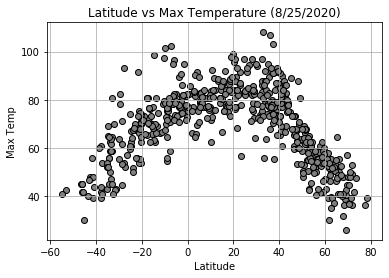

In [11]:
plt.scatter(cities_df['Latitude'], cities_df['Max Temperature'], c='grey', edgecolors='black',)
plt.title('Latitude vs Max Temperature (8/25/2020)')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig('../output_data/Latitude vs Max Temperature 8-25-20.png')

The Code is creating a scatterplot for the Cities to find a relation between their Max Temperature their its Latitude (GeoGraphicaL Location in relation to the equator). The analysis, further away for 0° Latitude, the lower the temperature. Heat rose like an arrow-shape toward 20°-40° Latitude.

## Latitude vs. Humidity Plot

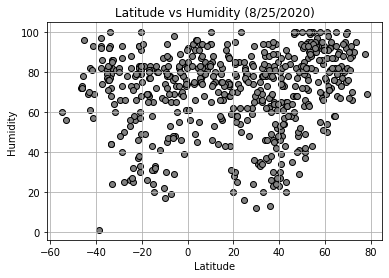

In [12]:
plt.scatter(cities_df['Latitude'], cities_df['Humidity'], c='grey', edgecolors='black',)
plt.title('Latitude vs Humidity (8/25/2020)')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.savefig('../output_data/Latitude vs Humidity 8-25-20.png')

The Code is creating a scatterplot for the Cities to find a relation between their Humidity and their its Latitude (GeoGraphicaL Location in relation to the equator). Humidity is seen to be unrelated to it.

## Latitude vs. Cloudiness Plot

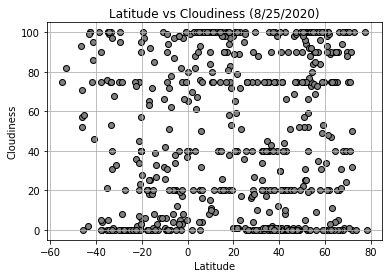

In [13]:
plt.scatter(cities_df['Latitude'], cities_df['Cloudiness'],c='grey', edgecolors='black',)
plt.title('Latitude vs Cloudiness (8/25/2020)')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.savefig('../output_data/Cloudiness 8-25-20.png')

The Code is creating a scatterplot for the Cities to find a relation between their cloudiness and their its Latitude. There do not seem to be much relation but I questioned the methods gathering data for cloudiness. Majority of results are nice even numbers (0, 20, 40 ,75 , 100).

## Latitude vs. Wind Speed Plot

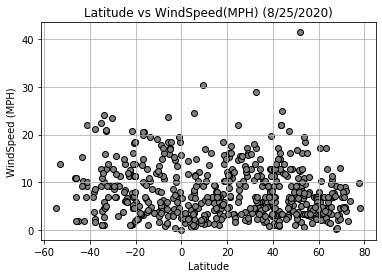

In [14]:
plt.scatter(cities_df['Latitude'], cities_df['Windspeed'], c='grey', edgecolors='black',)
plt.title('Latitude vs WindSpeed(MPH) (8/25/2020)')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('WindSpeed (MPH)')

plt.savefig('../output_data/Windspeed 8-25-20.png')

The Code is creating a scatterplot for the Cities to find a relation between their Windspeed and their its Latitude. Gathering from this data. Normal City had Windspeed below 10-20 MPH. No correlation seen.

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots
# def l_regr(x_values, y_values):
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#     regress_values = x_values * slope + intercept
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#     return plt.plot(x_values,regress_values,"r-")
# #     return plt.scatter(x_values,y_values)

#     return plt.annotate(line_eq,(25,200),fontsize=15,color="red")


In [15]:
# Create Northern and Southern Hemisphere DataFrames
north_hem= cities_df.loc[cities_df['Latitude']> 0, :]
south_hem= cities_df.loc[cities_df['Latitude']< 0, :]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

rvalue=-0.7449963146148438


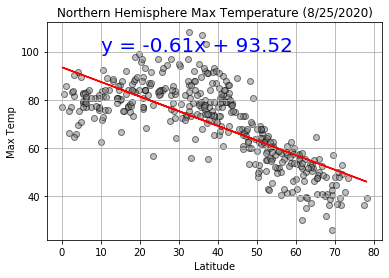

In [33]:
x_list=north_hem['Latitude']
y_list=north_hem['Max Temperature']

plt.scatter(x_list, y_list, color='grey', edgecolors='black', alpha='0.5')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_list, y_list)
regress_values = x_list * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10, 100), fontsize=20,color="Blue",)
plt.plot(x_list,regress_values,"r-")
print(f'rvalue={rvalue}')
plt.title('Northern Hemisphere Max Temperature (8/25/2020)')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.savefig('../output_data/Northern Hemisphere Max Temperature  8-25-20.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

rvalue=0.7598001137519542


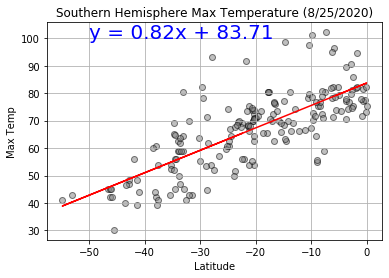

In [26]:
x_list=south_hem['Latitude']
y_list=south_hem['Max Temperature']

plt.scatter(x_list, y_list, color='grey', edgecolors='black', alpha='0.5')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_list, y_list)
regress_values = x_list * slope + intercept
plt.plot(x_list,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50, 100), fontsize=20,color="Blue")
print(f'rvalue={rvalue}')

plt.title('Southern Hemisphere Max Temperature (8/25/2020)')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig('../output_data/Southern Hemisphere Max Temperature 8-25-20.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

rvalue=0.14836615663410815


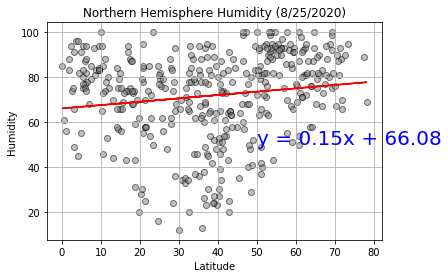

In [27]:
x_list=north_hem['Latitude']
y_list=north_hem['Humidity']

plt.scatter(x_list, y_list, color='grey', edgecolors='black', alpha='0.5')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_list, y_list)
regress_values = x_list * slope + intercept
plt.plot(x_list,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(50, 50), fontsize=20,color="Blue")
print(f'rvalue={rvalue}')

plt.title('Northern Hemisphere Humidity (8/25/2020)')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.savefig('../output_data/Northern Hemisphere Humidity 8-25-20.png')


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

rvalue=-0.09015425273561592


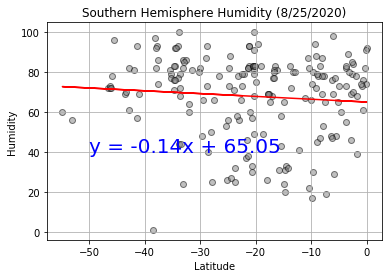

In [28]:
x_list=south_hem['Latitude']
y_list=south_hem['Humidity']

plt.scatter(x_list, y_list, color='grey', edgecolors='black', alpha='0.5')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_list, y_list)
regress_values = x_list * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_list,regress_values,"r-")
plt.annotate(line_eq,(-50, 40), fontsize=20,color="Blue")
print(f'rvalue={rvalue}')

plt.title('Southern Hemisphere Humidity (8/25/2020)')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.savefig('../output_data/Southern Hemisphere Humidity 8-25-20.png')


The linear regression shown no correlation between humidity and its latitude. But there is certainly more varieties of humidity data of the cities located in the 20°-40° Latitude Range. (Might be the same thing that affect the Max Temperature)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

rvalue=-0.06632395787504027


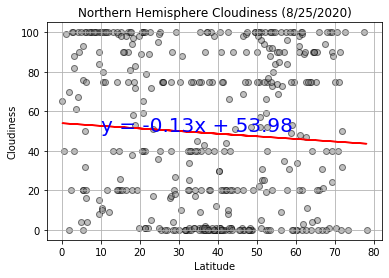

In [29]:
x_list=north_hem['Latitude']
y_list=north_hem['Cloudiness']

plt.scatter(x_list, y_list, color='grey', edgecolors='black', alpha='0.5')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_list, y_list)
regress_values = x_list * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10, 50), fontsize=20,color="Blue")
plt.plot(x_list,regress_values,"r-")

print(f'rvalue={rvalue}')

plt.title('Northern Hemisphere Cloudiness (8/25/2020)')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.savefig('../output_data/Northern Hemisphere Cloudiness 8-25-20.png')


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

rvalue=-0.11687538811328796


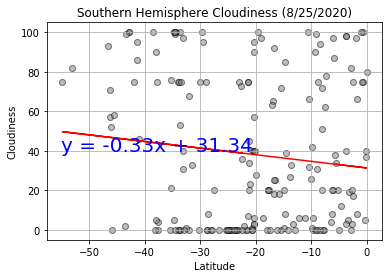

In [30]:
x_list=south_hem['Latitude']
y_list=south_hem['Cloudiness']

plt.scatter(x_list, y_list, color='grey', edgecolors='black', alpha='0.5')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_list, y_list)
regress_values = x_list * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-55, 40), fontsize=20,color="Blue")
plt.plot(x_list,regress_values,"r-")

print(f'rvalue={rvalue}')

plt.title('Southern Hemisphere Cloudiness (8/25/2020)')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.savefig('../output_data/Southern Hemisphere Cloudiness 8-25-20.png')


The linear regression shown no correlation between clouds and its cloudiness. But I questioned the methodology of cloudiness data gathering. Explained above. Seemed that are more data for the cities in the north than the south.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

rvalue=-0.05739758074788024


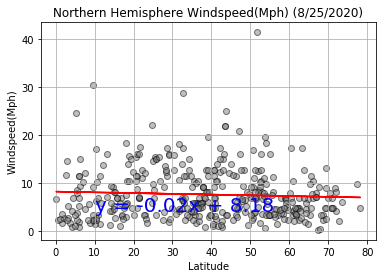

In [31]:
x_list=north_hem['Latitude']
y_list=north_hem['Windspeed']

plt.scatter(x_list, y_list, color='grey', edgecolors='black', alpha='0.5')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_list, y_list)
regress_values = x_list * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_list,regress_values,"r-")

plt.annotate(line_eq,(10, 4), fontsize=20,color="Blue")
print(f'rvalue={rvalue}')

plt.title('Northern Hemisphere Windspeed(Mph) (8/25/2020)')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Windspeed(Mph)')

plt.savefig('../output_data/Northern Hemisphere Windspeed(Mph) 8-25-20.png')


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

rvalue=-0.0039506133322684146


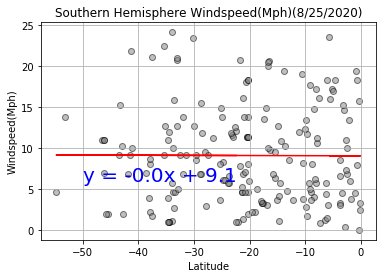

In [32]:
x_list=south_hem['Latitude']
y_list=south_hem['Windspeed']

plt.scatter(x_list, y_list, color='grey', edgecolors='black', alpha='0.5')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_list, y_list)
regress_values = x_list * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_list,regress_values,"r-")
plt.annotate(line_eq,(-50, 6), fontsize=20,color="Blue")
print(f'rvalue={rvalue}')

plt.title('Southern Hemisphere Windspeed(Mph)(8/25/2020)')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Windspeed(Mph)')
plt.savefig('../output_data/Southern Hemisphere Windspeed(Mph) 8-25-20')


The linear regression shown no correlation between clouds and its Windspeed.

Three Observable Trend: Note this data came from August 25/2020. The weather may change by the date.

0. The Northern Hemisphere shown cities up to Latitude 80°, but the Southern Hemisphere shown none below Latitude -60°. With other charts, visual looks (dots defining cities are more dense) suggest that there significantly more cities, north of the equator than south of it. Or simply OpenWeather API does not had record on those cities. Quick google seraches found that the southernmost country in the world is Chile -59°.
1. Cloudiness has no correlation on how far it is from the equator.
2. Generally, the closer a city to an equator, the more max temperature they have. But the hottest cities located around Latitude 20° to 40° with a few outliers. (I wonder if it might be related to the Tropic of Cancer 23°)
3. As of 8-25-2020. Windspeed across the world cities are below 20 Mph. Only two cities had faced more than 30 MPH.